In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_NE_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,NaN,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,NaN,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,NaN,NaN,0.0040,0.0117
4,0.0762,NaN,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,NaN,0.0107,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,NaN,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,NaN,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,NaN,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,NaN,0.0079,0.0036,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	20
float64		column 3	0
float64		column 4	0
float64		column 5	20
float64		column 6	20
float64		column 7	0
float64		column 8	20
float64		column 9	20
float64		column 10	0
float64		column 11	0
float64		column 12	20
float64		column 13	0
float64		column 14	0
float64		column 15	0
float64		column 16	20
float64		column 17	0
float64		column 18	20
float64		column 19	20
float64		column 20	0
float64		column 21	40
float64		column 22	0
float64		column 23	0
float64		column 30	0
float64		column 25	20
float64		column 26	0
float64		column 27	0
float64		column 28	0
float64		column 29	0
float64		column 30	0
float64		column 31	0
float64		column 32	40
float64		column 33	20
float64		column 34	0
float64		column 35	20
float64		column 36	20
float64		column 37	20
float64		column 38	0
float64		column 39	20
float64		column 40	0
float64		column 41	40
float64		column 42	0
float64		column 43	20
float64		column 44	0
float64		column 45	20
float6

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,208.000000,188.000000,208.000000,208.000000,188.000000,188.000000,208.000000,188.000000,188.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,168.000000,188.000000,208.000000,188.000000
mean,0.029164,0.038588,0.043832,0.053892,0.072722,0.102164,0.121747,0.129848,0.176738,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.008027,0.007994,0.007941,0.006434
std,0.022991,0.033468,0.038428,0.046528,0.050252,0.055994,0.061788,0.080494,0.115144,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005799,0.006612,0.006181,0.004271
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016575,0.018950,0.024375,0.038950,0.066725,0.080900,0.077775,0.098525,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003875,0.003575,0.003675,0.003175
50%,0.022800,0.030850,0.034300,0.044050,0.061850,0.092150,0.106950,0.111700,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.006600,0.005850,0.006400,0.005450
75%,0.035550,0.047475,0.057950,0.064500,0.095500,0.132750,0.154000,0.168550,0.230850,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.322500,0.382300,0.372900,0.459000,0.658700,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.023100


<AxesSubplot:>

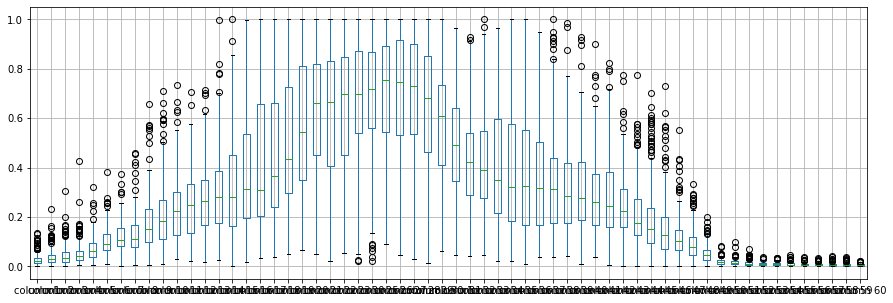

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029164
column 2       0.038588
column 3       0.043832
column 4       0.053892
column 5       0.072722
column 6       0.102164
column 7       0.121747
column 8       0.129848
column 9       0.176738
column 10      0.208259
column 11      0.236013
column 12      0.252347
column 13      0.273305
column 14      0.296568
column 15      0.320201
column 16      0.377509
column 17      0.415983
column 18      0.443301
column 19      0.499535
column 20      0.563047
column 21      0.629894
column 22      0.624275
column 23      0.646975
column 30      0.672654
column 25      0.674248
column 26      0.699866
column 27      0.702155
column 28      0.694024
column 29      0.642074
column 30.1    0.580928
column 31      0.504475
column 32      0.431636
column 33      0.420421
column 34      0.403233
column 35      0.395923
column 36      0.391406
column 37      0.364153
column 38      0.339657
column 39      0.319260
column 40      0.311207
column 41      0.292095
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.745667,0.571537,0.491438,0.250488,0.234183,0.260815,0.328687,0.321386,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.362685,0.379415,0.357116,0.352938
column 2,0.745667,1.000000,0.781918,0.628198,0.299535,0.323997,0.284918,0.270999,0.266488,0.260703,...,0.335937,0.482484,0.338258,0.359842,0.365734,0.248274,0.338947,0.359493,0.365427,0.444758
column 3,0.571537,0.781918,1.000000,0.781786,0.487668,0.296377,0.190434,0.194684,0.265360,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.434193,0.339468,0.425047,0.406689
column 4,0.491438,0.628198,0.781786,1.000000,0.681944,0.319046,0.246440,0.215670,0.259187,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.358000,0.357878,0.420266,0.385509
column 5,0.250488,0.299535,0.487668,0.681944,1.000000,0.651978,0.369318,0.238364,0.193639,0.185705,...,0.154871,0.211459,0.280311,0.225877,0.240174,0.276761,0.338296,0.286373,0.329536,0.162277
column 6,0.234183,0.323997,0.296377,0.319046,0.651978,1.000000,0.698319,0.394949,0.250941,0.243487,...,0.211153,0.210078,0.142909,0.136413,0.124434,0.172155,0.123429,0.185745,0.231308,0.177850
column 7,0.260815,0.284918,0.190434,0.246440,0.369318,0.698319,1.000000,0.680854,0.462873,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.202666,0.265146,0.183578,0.214232
column 8,0.328687,0.270999,0.194684,0.215670,0.238364,0.394949,0.680854,1.000000,0.779260,0.679672,...,0.300964,0.175051,0.077116,0.244213,0.251804,0.229514,0.231508,0.280438,0.152035,0.178241
column 9,0.321386,0.266488,0.265360,0.259187,0.193639,0.250941,0.462873,0.779260,1.000000,0.875727,...,0.226925,0.184986,0.073666,0.253672,0.182842,0.213412,0.246938,0.208817,0.065842,0.069000
column 10,0.318276,0.260703,0.219637,0.237769,0.185705,0.243487,0.425448,0.679672,0.875727,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.183014,0.215879,0.058273,0.096261


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+28,60+28+28,60+28+28+28,60+28+28,60+28,60], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.031609021700344
Epoch: 1 , loss: 17.78368700467623
Epoch: 2 , loss: 17.657867431640625
Epoch: 3 , loss: 17.556771058302658
Epoch: 4 , loss: 17.50088706383338
Epoch: 5 , loss: 17.408905176016
Epoch: 6 , loss: 17.27310958275428
Epoch: 7 , loss: 17.15851094172551
Epoch: 8 , loss: 17.07567860529973
Epoch: 9 , loss: 16.92495111318735
Epoch: 10 , loss: 16.74648482982929
Epoch: 11 , loss: 16.47669608776386
Epoch: 12 , loss: 16.12051824422983
Epoch: 13 , loss: 15.582791915306679
Epoch: 14 , loss: 14.721998654879057
Epoch: 15 , loss: 13.399011025061974
Epoch: 16 , loss: 12.026808078472431
Epoch: 17 , loss: 10.979361534118652
Epoch: 18 , loss: 10.322824551508976
Epoch: 19 , loss: 9.93292991931622
Epoch: 20 , loss: 9.59174633026123
Epoch: 21 , loss: 9.42295580643874
Epoch: 22 , loss: 9.15081735757681
Epoch: 23 , loss: 9.251702015216534
Epoch: 24 , loss: 8.984289682828463
Epoch: 25 , loss: 9.040931921738844
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.066400
column 2       0.057500
column 3       0.084200
column 4       0.037200
column 5       0.045800
column 6       0.077100
column 7       0.077100
column 8       0.113000
column 9       0.235300
column 10      0.183800
column 11      0.286900
column 12      0.412900
column 13      0.364700
column 14      0.198400
column 15      0.284000
column 16      0.403900
column 17      0.583700
column 18      0.679200
column 19      0.608600
column 20      0.485800
column 21      0.534317
column 22      0.201300
column 23      0.208200
column 30      0.168600
column 25      0.574729
column 26      0.273600
column 27      0.298400
column 28      0.465500
column 29      0.699000
column 30.1    0.747400
column 31      0.795600
column 32      0.798100
column 33      0.671500
column 34      0.694200
column 35      0.335032
column 36      0.816900
column 37      0.891200
column 38      1.000000
column 39      0.875300
column 40      0.706100
column 41      0.680300
column 42      0

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.244415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,-0.113786,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000293,0.002581,0.0,0.000000
4,0.0,-0.023203,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006109,0.0,-0.002668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
204,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004226,0.000000,0.0,0.000000
205,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.032621,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.006929,0.000000,0.0,0.000000
206,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005787,0.000000,0.0,-0.000447


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5.056886755368598

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.11348222921439298

In [19]:
new_df.iloc[66,:]

column 1       0.026500
column 2       0.044000
column 3       0.013700
column 4       0.008400
column 5       0.030500
column 6       0.043800
column 7       0.034100
column 8       0.078000
column 9       0.185680
column 10      0.077900
column 11      0.032700
column 12      0.206000
column 13      0.190800
column 14      0.106500
column 15      0.145700
column 16      0.223200
column 17      0.207000
column 18      0.110500
column 19      0.107800
column 20      0.116500
column 21      0.222400
column 22      0.068900
column 23      0.206000
column 30      0.238400
column 25      0.090400
column 26      0.227800
column 27      0.587200
column 28      0.845700
column 29      0.846700
column 30.1    0.767900
column 31      0.805500
column 32      0.626000
column 33      0.654500
column 34      0.874700
column 35      0.988500
column 36      0.934800
column 37      0.696000
column 38      0.573300
column 39      0.587200
column 40      0.666300
column 41      0.565100
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.037100,0.0428,0.0207,0.0954,0.098600,0.1539,0.160100,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018000,0.008400,0.0090,0.003200
1,0.0453,0.052300,0.0843,0.0689,0.1183,0.258300,0.2156,0.103685,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014000,0.004900,0.0052,0.004400
2,0.0262,0.058200,0.1099,0.1083,0.0974,0.114214,0.2431,0.377100,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.031600,0.016400,0.0095,0.007800
3,0.0100,0.017100,0.0623,0.0205,0.0205,0.036800,0.1098,0.127600,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.005293,0.006981,0.0040,0.011700
4,0.0762,0.043397,0.0481,0.0394,0.0590,0.064900,0.1209,0.246700,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.007200,0.010909,0.0107,0.006732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.034600,0.0168,0.0177,0.0393,0.163000,0.2028,0.169400,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.006500,0.011500,0.0193,0.015700
204,0.0323,0.010100,0.0298,0.0564,0.0760,0.095800,0.0990,0.101800,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.007626,0.003200,0.0062,0.006700
205,0.0522,0.043700,0.0180,0.0292,0.0351,0.117100,0.1257,0.085179,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.007071,0.013800,0.0077,0.003100
206,0.0303,0.035300,0.0490,0.0608,0.0167,0.135400,0.1465,0.112300,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.009187,0.007900,0.0036,0.004353


In [21]:
imputations[-1].to_excel("Sonar_NE_5(imp).xlsx", index=False, header=False)